In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the data from sheet1

data = pd.read_csv(r"C:\Users\isuser.SRKRIT\Desktop\data.csv", header=0)

# Display the shape

data.shape

(64958, 14)

In [3]:
data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [4]:
data.isnull().sum()       

id                  0
year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['institute_type'] = LE.fit_transform(data['institute_type'])
data['quota'] = LE.fit_transform(data['quota'])
data['pool'] = LE.fit_transform(data['pool'])
data['institute_short'] = LE.fit_transform(data['institute_short'])
data['program_name'] = LE.fit_transform(data['program_name'])
data['degree_short'] = LE.fit_transform(data['degree_short'])
data['category'] = LE.fit_transform(data['category'])

In [6]:
data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,0,6,0,1,4,0,4 Years,4,0,838,1841,0
1,2,2016,0,6,0,1,4,0,4 Years,4,4,408,1098,0
2,3,2016,0,6,0,1,4,0,4 Years,4,6,297,468,0
3,4,2016,0,6,0,1,4,0,4 Years,4,8,79,145,0
4,5,2016,0,6,0,1,4,0,4 Years,4,3,94,94,0


In [7]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['program_duration'] = LE.fit_transform(data['program_duration'])

In [8]:
data.nunique()

id                  25458
year                    6
institute_type          2
round_no                4
quota                   7
pool                    2
institute_short        54
program_name          130
program_duration        2
degree_short           13
category               10
opening_rank        10984
closing_rank        11940
is_preparatory          2
dtype: int64

In [9]:
del data['id']

In [10]:
# Identify the Independent and Target variables

IndepVar = []
for col in data.columns:
    if col != 'is_preparatory':
        IndepVar.append(col)

TargetVar = 'is_preparatory'

x = data[IndepVar]
y = data[TargetVar]

In [11]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [13]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (> 10 : 1, then the dataset is imbalance data)

count_is_preparatory=data.is_preparatory.value_counts()
print('Class 0:', count_is_preparatory[0])
print('Class 1:', count_is_preparatory[1])
print('Proportion:', round(count_is_preparatory[0] / count_is_preparatory[1], 2), ': 1')
print('Total :', len(data))

Class 0: 61864
Class 1: 3094
Proportion: 19.99 : 1
Total : 64958


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              64958 non-null  int64
 1   institute_type    64958 non-null  int32
 2   round_no          64958 non-null  int64
 3   quota             64958 non-null  int32
 4   pool              64958 non-null  int32
 5   institute_short   64958 non-null  int32
 6   program_name      64958 non-null  int32
 7   program_duration  64958 non-null  int32
 8   degree_short      64958 non-null  int32
 9   category          64958 non-null  int32
 10  opening_rank      64958 non-null  int64
 11  closing_rank      64958 non-null  int64
 12  is_preparatory    64958 non-null  int64
dtypes: int32(8), int64(5)
memory usage: 4.5 MB


In [20]:
EMResults = pd.read_csv(r"C:\Users\isuser.SRKRIT\Downloads\HTResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  820   105]
 [   67 18496]]
Outcome values : 
 820 105 67 18496
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.89      0.91       925
           0       0.99      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.96      0.94      0.95     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.1 %
Precision : 92.4 %
Recall : 88.6 %
F1 Score : 0.905
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 94.1 %
MCC : 0.901
roc_auc_score: 0.941


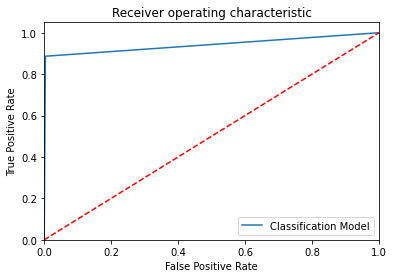

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  843    82]
 [   12 18551]]
Outcome values : 
 843 82 12 18551
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.91      0.95       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.99      0.96      0.97     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.5 %
Precision : 98.6 %
Recall : 91.1 %
F1 Score : 0.947
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 95.5 %
MCC : 0.945
roc_auc_score: 0.955


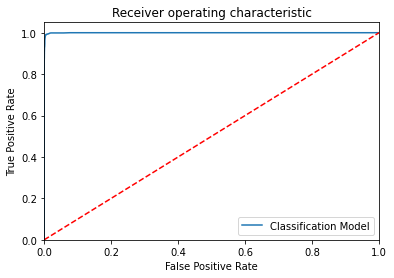

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  853    72]
 [   28 18535]]
Outcome values : 
 853 72 28 18535
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.92      0.94       925
           0       1.00      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.98      0.96      0.97     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.5 %
Precision : 96.8 %
Recall : 92.2 %
F1 Score : 0.945
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 96.0 %
MCC : 0.942
roc_auc_score: 0.96


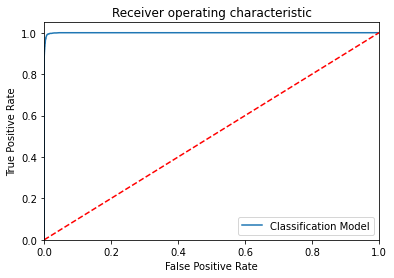

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  776   149]
 [   70 18493]]
Outcome values : 
 776 149 70 18493
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.84      0.88       925
           0       0.99      1.00      0.99     18563

    accuracy                           0.99     19488
   macro avg       0.95      0.92      0.94     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 98.9 %
Precision : 91.7 %
Recall : 83.9 %
F1 Score : 0.876
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 91.8 %
MCC : 0.871
roc_auc_score: 0.918


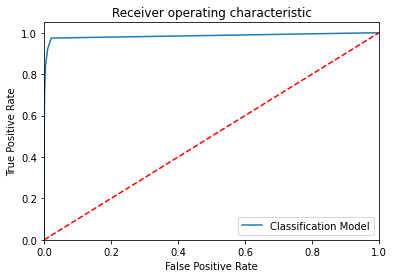

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[  101   824]
 [   31 18532]]
Outcome values : 
 101 824 31 18532
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.11      0.19       925
           0       0.96      1.00      0.98     18563

    accuracy                           0.96     19488
   macro avg       0.86      0.55      0.58     19488
weighted avg       0.95      0.96      0.94     19488

Accuracy : 95.6 %
Precision : 76.5 %
Recall : 10.9 %
F1 Score : 0.191
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 55.4 %
MCC : 0.279
roc_auc_score: 0.554


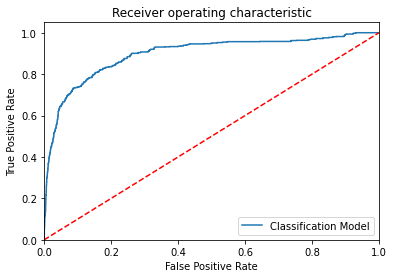

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  852    73]
 [   26 18537]]
Outcome values : 
 852 73 26 18537
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.92      0.95       925
           0       1.00      1.00      1.00     18563

    accuracy                           0.99     19488
   macro avg       0.98      0.96      0.97     19488
weighted avg       0.99      0.99      0.99     19488

Accuracy : 99.5 %
Precision : 97.0 %
Recall : 92.1 %
F1 Score : 0.945
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 96.0 %
MCC : 0.943
roc_auc_score: 0.96


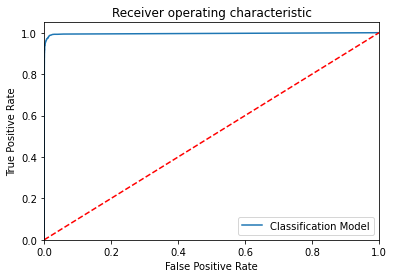

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[  543   382]
 [   39 18524]]
Outcome values : 
 543 382 39 18524
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.59      0.72       925
           0       0.98      1.00      0.99     18563

    accuracy                           0.98     19488
   macro avg       0.96      0.79      0.85     19488
weighted avg       0.98      0.98      0.98     19488

Accuracy : 97.8 %
Precision : 93.3 %
Recall : 58.7 %
F1 Score : 0.721
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 79.2 %
MCC : 0.731
roc_auc_score: 0.792


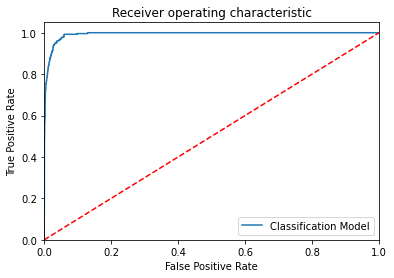

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[  877    48]
 [   27 18536]]
Outcome values : 
 877 48 27 18536
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.95      0.96       925
           0       1.00      1.00      1.00     18563

    accuracy                           1.00     19488
   macro avg       0.98      0.97      0.98     19488
weighted avg       1.00      1.00      1.00     19488

Accuracy : 99.6 %
Precision : 97.0 %
Recall : 94.8 %
F1 Score : 0.959
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 97.4 %
MCC : 0.957
roc_auc_score: 0.973


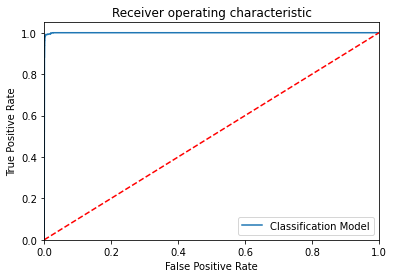

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  925     0]
 [ 5553 13010]]
Outcome values : 
 925 0 5553 13010
Classification report : 
               precision    recall  f1-score   support

           1       0.14      1.00      0.25       925
           0       1.00      0.70      0.82     18563

    accuracy                           0.72     19488
   macro avg       0.57      0.85      0.54     19488
weighted avg       0.96      0.72      0.80     19488

Accuracy : 71.5 %
Precision : 14.3 %
Recall : 100.0 %
F1 Score : 0.25
Specificity or True Negative Rate : 70.1 %
Balanced Accuracy : 85.0 %
MCC : 0.316
roc_auc_score: 0.85


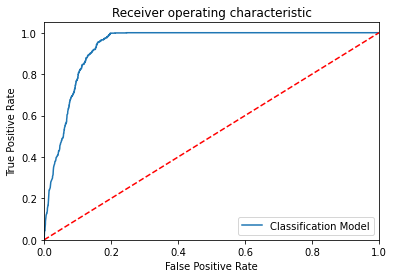

-----------------------------------------------------------------------------------------------------


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters


ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [23]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,DecisionTreeClassifier(),820,105,67,18496,0.991,0.924,0.886,0.905,0.996,0.901,0.941439,0.941
1,"(DecisionTreeClassifier(max_features='auto', r...",843,82,12,18551,0.995,0.986,0.911,0.947,0.999,0.945,0.955352,0.955
2,"(ExtraTreeClassifier(random_state=722370420), ...",853,72,28,18535,0.995,0.968,0.922,0.945,0.998,0.942,0.960327,0.960
3,KNeighborsClassifier(),776,149,70,18493,0.989,0.917,0.839,0.876,0.996,0.871,0.917574,0.918
4,SVC(probability=True),101,824,31,18532,0.956,0.765,0.109,0.191,0.998,0.279,0.553760,0.554
5,(DecisionTreeClassifier(random_state=147384717...,852,73,26,18537,0.995,0.970,0.921,0.945,0.999,0.943,0.959840,0.960
6,([DecisionTreeRegressor(criterion='friedman_ms...,543,382,39,18524,0.978,0.933,0.587,0.721,0.998,0.731,0.792463,0.792
7,LGBMClassifier(),877,48,27,18536,0.996,0.970,0.948,0.959,0.999,0.957,0.973327,0.974
8,GaussianNB(),925,0,5553,13010,0.715,0.143,1.000,0.250,0.701,0.316,0.850428,0.850
